#<b>Question)
 Data-driven prediction of energy use of appliances The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions  round 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

#<b>Answer:

<b>
The dataset collected contain various information regarding features by which energy is being used. The features incorporated by temperature, humidity, wind speed, pressure, etc. Our main target is to analyze the data and predict the energy consumed by the house using the given dataset. For the same, we need to develop a supervised machine learning model based on regression approach.  


<b>
The usage of electricity in low energy houses can be determined by two important factors such as no of appliances consuming the energy and another is actual amount of usage of energy. Also, inside the house, the energy consumption is affected by various factors such as temperature, humidity, pressure, etc. For that, it is necessary to develop the model which can predict the energy usage as well as indicates the wastage of energy as well as abnormal usage of energy. Overall prediction will surely help in organizing the load demand as well as supply.

<b>1) Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics
from sklearn.metrics import mean_squared_error

<b>2) Reading the dataset

In [ ]:
in_data = pd.read_csv('data_application_energy.csv')

Display the FIRST 5 Observations

In [ ]:
print('First 5 Observation')
print(in_data.head())

First 5 Observation
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  W

Display the LAST 5 Observations

In [ ]:
print('Last 5 Observation')
print(in_data.tail())

Last 5 Observation
                      date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoin

Display the Number of Variables & Number of Observations

In [ ]:
print('Number of Variables')
print(in_data.shape)

Number of Variables
(19735, 29)


Display the Variable Names and their Data Types

In [ ]:
print('Number of Variables Names and their Data Types')
print(in_data.dtypes)

Number of Variables Names and their Data Types
date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


Dropping unnecessary features.

In [ ]:
in_data = in_data.drop(["date"],axis = 1)


In [ ]:
print(in_data.describe())

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

Feature ranges
1.	Temperature range : -6 to 30 deg

2.	Humidity range : 1 to 100 %

3.	Windspeed range: 0 to 14 m/s

4.	Visibility range: 1 to 66 km

5.	Pressure range: 729 to 772 mm Hg

6.	Appliance Energy Usage range: 10 to 1080 Wh


The dataset was collected by sensors placed inside the house and outside readings came from the nearby weather station. The main attributes are temperature, humidity and pressure readings. Each observation measures electricity in a 10-minute interval. The temperatures and humidity have been averaged for 10-minute intervals.

Independent variables : 28(11 temperature, 10 humidity, 1 pressure, 2 randoms)

Dependent variable : 1 (Appliances)

To get a concise summary of the dataframe

In [ ]:
in_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

<b>3) Exploratory Analysis

In [ ]:
print("Number of rows: = {}".format(in_data.shape[0]))
print("Number of columns: = {}".format(in_data.columns.shape[0]))


Number of rows: = 19735
Number of columns: = 28


In [ ]:
print("Null values of each feature-")
print(in_data.isnull().sum())
#no null values in any of the columns

Null values of each feature-
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


Dividing the columns according to the data type

In [ ]:
temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"]
light = ["lights"]
random = ["rv1", "rv2"]
#date = ['month', 'weekday', 'hour', 'week']
outcome = ["Appliances"]

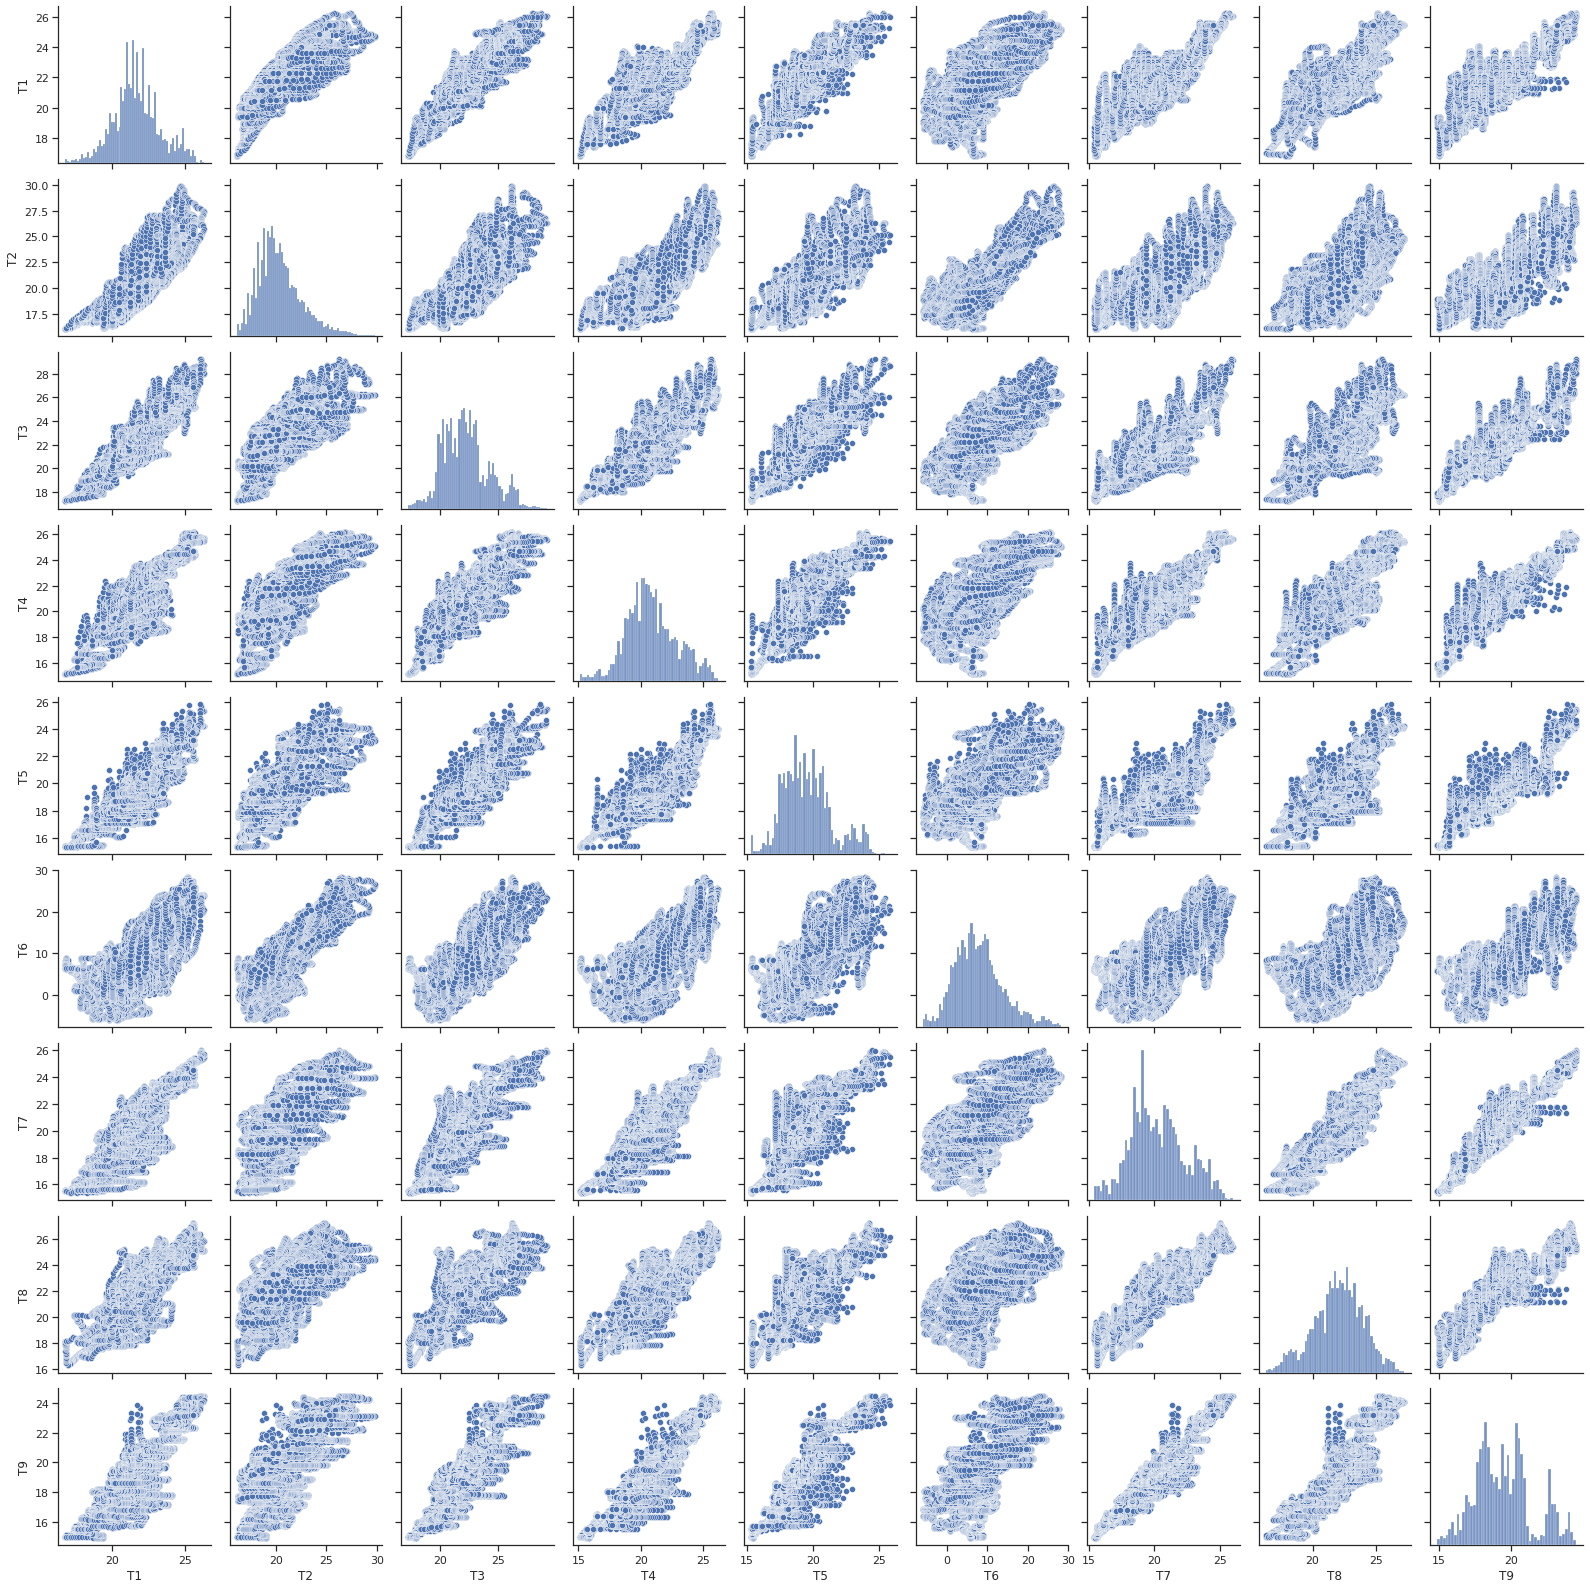

In [ ]:
col = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
sns.set(style="ticks", color_codes=True)
sns.pairplot(in_data[col])
plt.show();

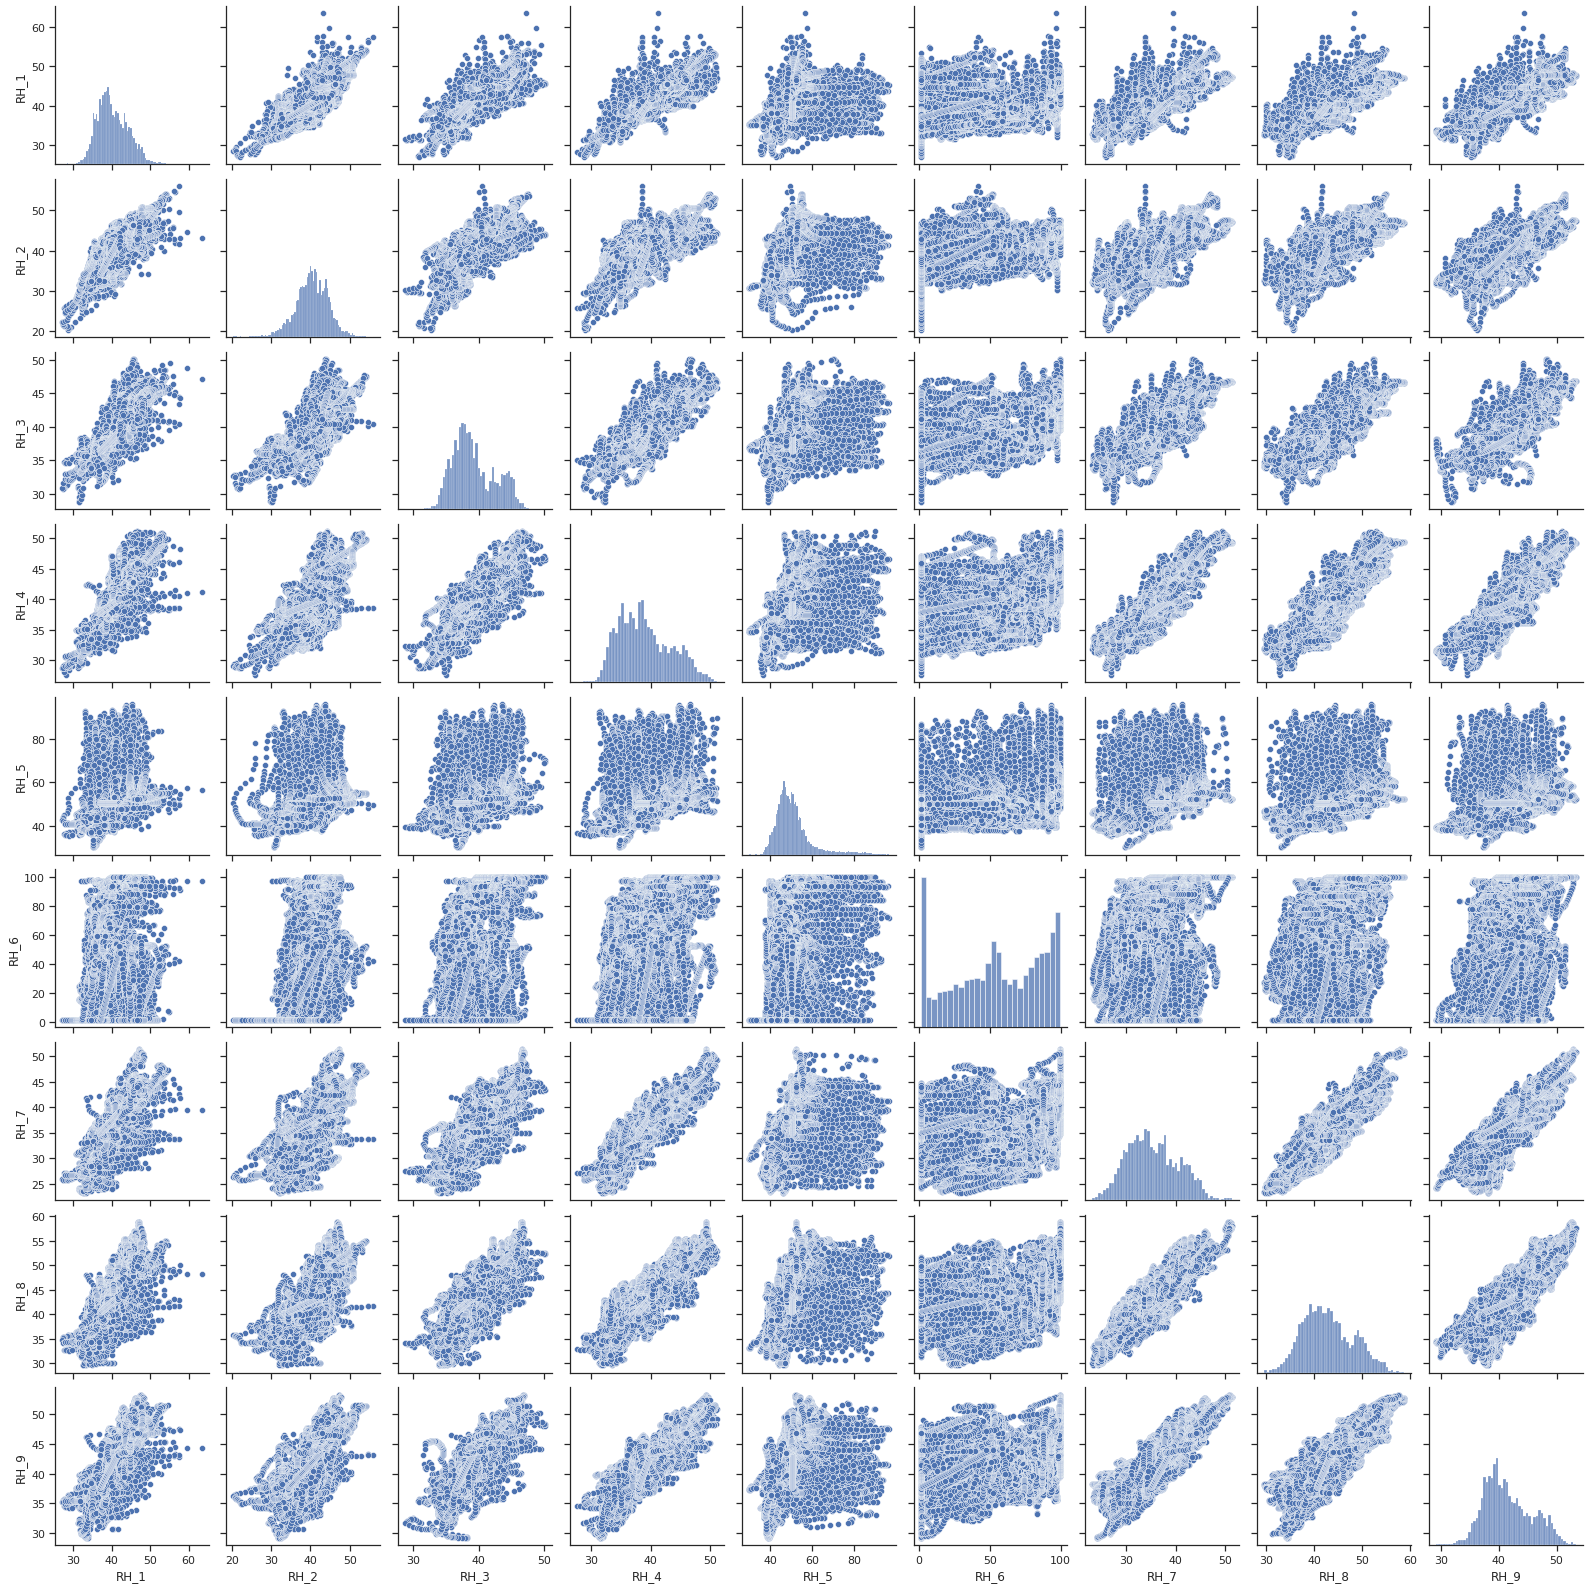

In [ ]:
col = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
sns.set(style="ticks", color_codes=True)
sns.pairplot(in_data[col])
plt.show();

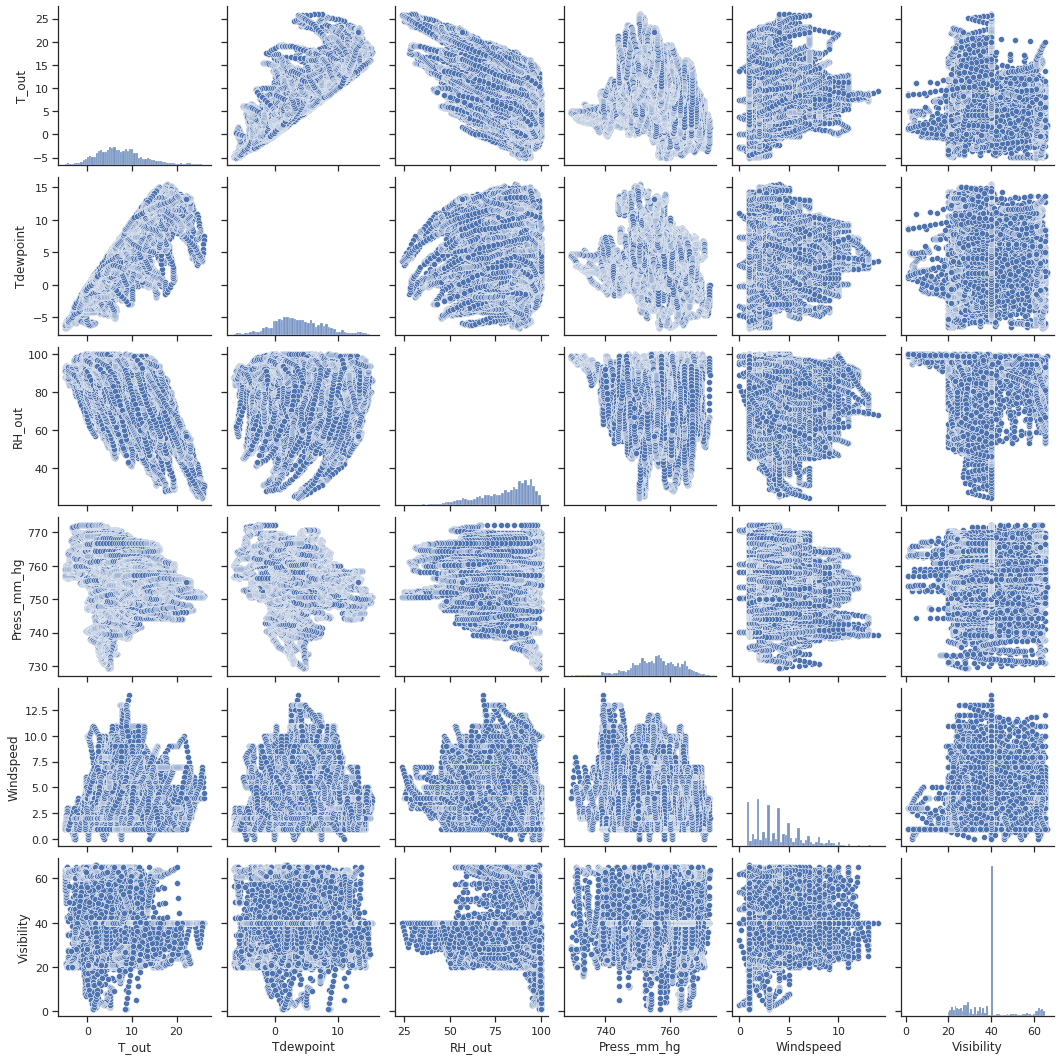

In [ ]:
col = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"]
sns.set(style="ticks", color_codes=True)

sns.pairplot(in_data[col])
plt.show();

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

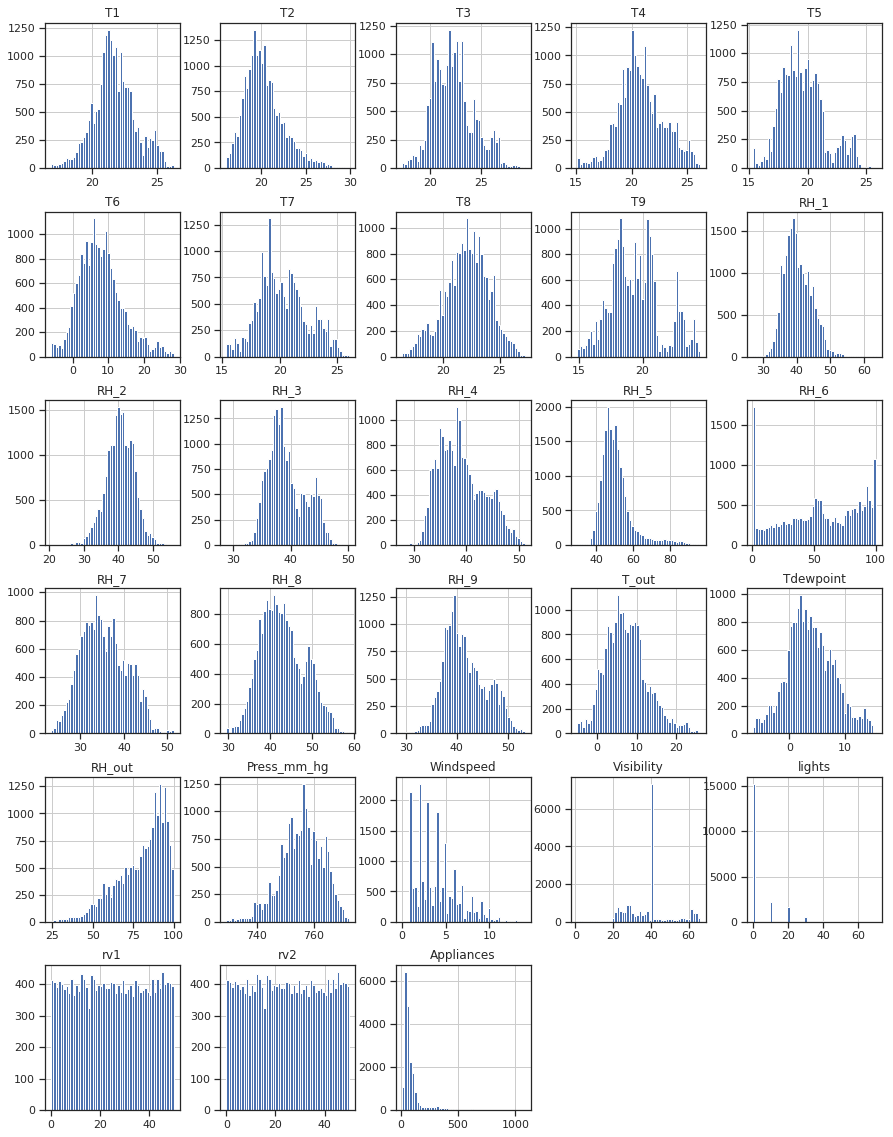

In [ ]:
print(in_data.describe())
plt.rcParams['font.size'] = '5'
in_data[temp+ humidity+ weather+ light+ random+ outcome ].hist(bins=50, figsize=(15,20));
plt.show()

<b>4) Splitting into train and validation

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

train, test = train_test_split(in_data,test_size=0.25,random_state=45)
x_var = train[temp+humidity+weather+random]
y_var = train[outcome]

in_data.describe()



Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [ ]:
print(x_var.describe())

                 T1            T2            T3            T4            T5  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean      21.691363     20.352254     22.276934     20.859244     19.595689   
std        1.599613      2.200985      2.002302      2.036924      1.835785   
min       16.790000     16.100000     17.200000     15.100000     15.340000   
25%       20.760000     18.790000     20.790000     19.500000     18.290000   
50%       21.600000     20.000000     22.100000     20.696667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.633333   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9          RH_1  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean       7.948801     20.266000     22.031770     19.487497     40.265813   
std        6.113783      2.107831      1.951539    

In [ ]:
print(y_var.describe())

         Appliances
count  14801.000000
mean      98.263631
std      103.338062
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1070.000000


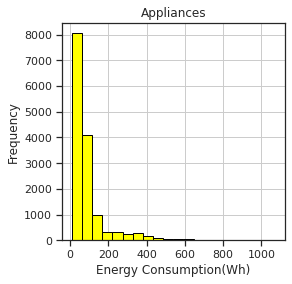

In [ ]:
appliance = y_var.hist(figsize=(4,4), bins=20,color='yellow',edgecolor='black')
for axe in appliance.flatten():
    axe.set_xlabel("Energy Consumption(Wh)")
    axe.set_ylabel("Frequency")
    plt.show()


When we will plot the appliance against the energy consumption graph, we can see that percentage of appliances consumption is less than 200Wh

<b>5) Checking distribution of features - Checking relationship between variables
-->Heatmap on target variable

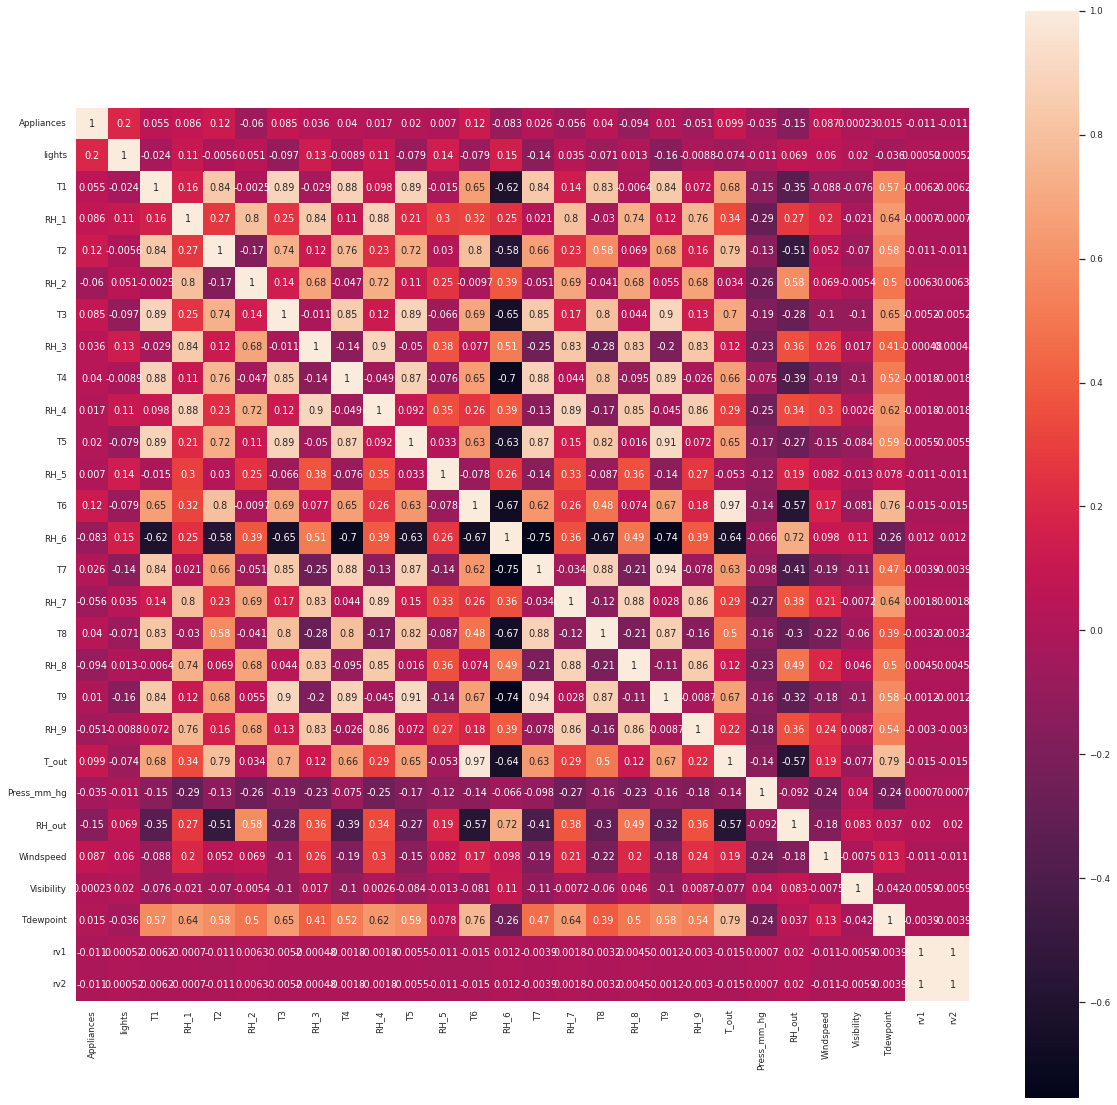

In [ ]:
correlation_matrix = in_data.corr()
sns.set(font_scale=0.8)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, square=True);
plt.show()

Conclusion---> From the correlation plot, we can see that Temperature values T!-T9 have positive correlational values.
For the observation of indoor temperatures, the correlations are looking like high, since the ventilation is characterised by the HRV unit and that minimizes air temperature differences between the rooms. There are four columns which have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) 

In [ ]:
train_X_var = train[x_var.columns]
train_Y_var = train[y_var.columns]
test_X_var = test[x_var.columns]
test_Y_var = test[y_var.columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


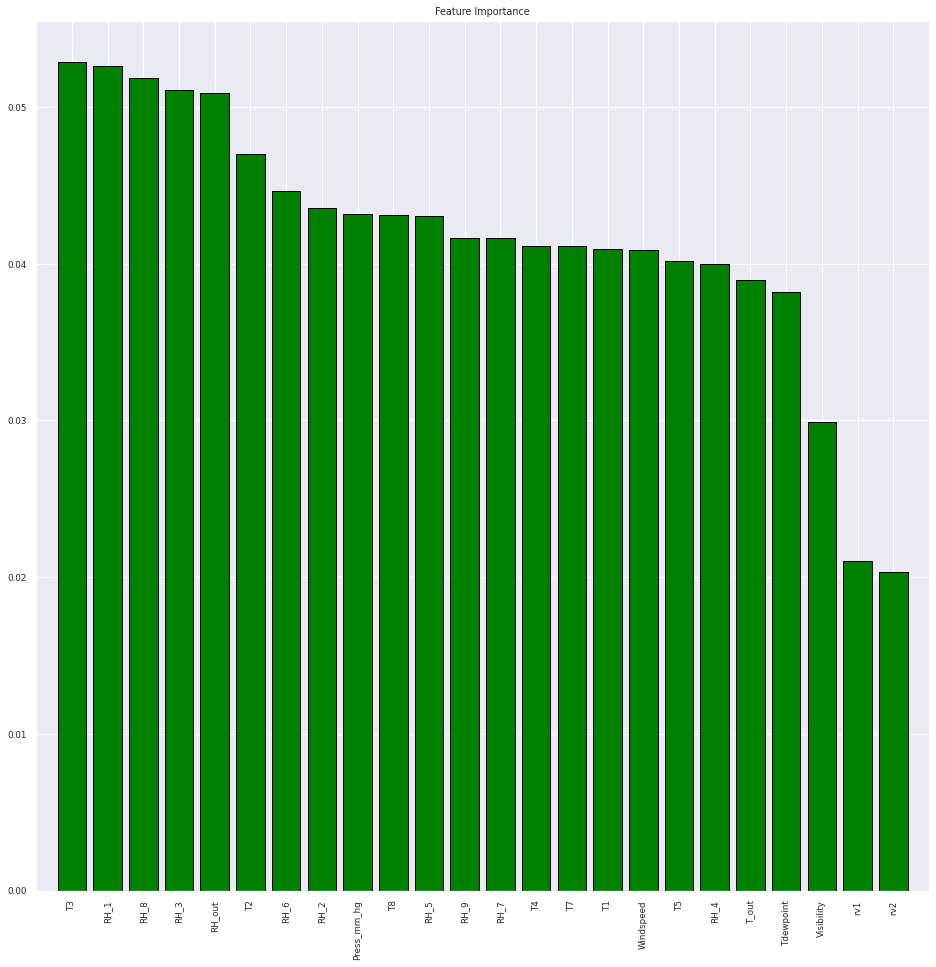

In [ ]:
train_X_var = train_X_var.drop(["T6", "T9"], axis=1)

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X_var, train_Y_var)

feature = train_X_var.columns.values
f_importance = model.feature_importances_
indices = np.argsort(f_importance)[::-1]
plt.figure(figsize=(16,16))
plt.title("Feature Importance")
plt.bar(range(len(indices)), f_importance[indices], color='green', align="center",edgecolor='black')
plt.xticks(range(len(indices)), feature[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

From feature importance graph we can analyzed that most important features are - 'RH_out', 'RH_8', 'RH_1', 'T3', 'RH_3'. Whereas least important features will be  - 'T7','Tdewpoint','Windspeed','T1','T5'.

In [ ]:
print(feature[indices])

train_X_var = train_X_var.drop(["rv1","rv2","Visibility"],axis=1)
test_X_var = test[x_var.columns]
test_Y_var = test[y_var.columns]
test_X_var.head()

test_X_var.drop(["T6", "T9","rv1","rv2","Visibility"], axis=1, inplace=True)











['T3' 'RH_1' 'RH_8' 'RH_3' 'RH_out' 'T2' 'RH_6' 'RH_2' 'Press_mm_hg' 'T8'
 'RH_5' 'RH_9' 'RH_7' 'T4' 'T7' 'T1' 'Windspeed' 'T5' 'RH_4' 'T_out'
 'Tdewpoint' 'Visibility' 'rv1' 'rv2']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(test_X_var.head())

              T1         T2         T3     T4     T5         T7     T8  \
15991  22.793333  21.500000  22.700000  21.39  20.10  19.500000  23.20   
14389  22.760000  22.890000  22.390000  22.79  19.79  22.218000  22.50   
15618  20.200000  17.356667  22.200000  19.70  18.70  19.200000  21.39   
10017  21.290000  18.200000  22.100000  19.60  19.20  19.200000  22.70   
8648   20.700000  19.000000  20.066667  20.39  17.79  21.533333  22.70   

            RH_1       RH_2       RH_3  ...       RH_5       RH_6       RH_7  \
15991  37.600000  34.330000  34.900000  ...  40.400000   1.000000  27.100000   
14389  32.663333  30.133333  35.560000  ...  40.193333   1.000000  26.296000   
15618  34.290000  37.400000  35.090000  ...  41.326667  36.045000  28.600000   
10017  38.223333  42.530000  36.933333  ...  46.000000  70.330000  32.433333   
8648   33.223333  34.300000  34.700000  ...  44.700000  27.833333  27.500000   

            RH_8       RH_9      T_out  Tdewpoint     RH_out  Press_mm_hg 

In [ ]:
print(train_X_var.head())

          T1         T2         T3         T4     T5      T7         T8  \
13469  21.29  18.066667  23.166667  21.290000  20.39  20.700  22.500000   
9177   20.50  19.730000  20.890000  20.323333  18.89  20.000  21.133333   
13017  22.15  19.722500  23.200000  21.290000  20.50  22.290  22.468571   
10469  21.20  18.600000  22.000000  21.000000  19.29  20.290  22.000000   
16657  22.60  25.193333  23.856667  23.066667  19.60  22.218  22.790000   

        RH_1       RH_2       RH_3  ...       RH_5       RH_6       RH_7  \
13469  41.90  47.163333  38.500000  ...  46.317500  56.560000  34.700000   
9177   34.93  38.230000  33.966667  ...  41.226667  43.050000  26.200000   
13017  39.40  42.290000  39.790000  ...  51.305714  26.963333  37.826667   
10469  39.79  43.560000  38.200000  ...  48.090000  53.696667  36.260000   
16657  36.70  32.530000  35.723333  ...  49.960000   1.000000  34.812000   

            RH_8       RH_9      T_out  Tdewpoint     RH_out  Press_mm_hg  \
13469  43.62666

In [ ]:
print(test_X_var.columns)

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')


In [ ]:
print(train_X_var.columns)

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')


<b>6) Import scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_ss=scaler.fit_transform(train_X_var)
X_test_ss=scaler.transform(test_X_var)
y_train_ss=scaler.fit_transform(train_Y_var)
y_test_ss=scaler.transform(test_Y_var)

In [ ]:


from sklearn.linear_model import Ridge, Lasso

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [
    ['Lasso: ', Lasso()],
    ['Ridge: ', Ridge()],
    ['RandomForest ', RandomForestRegressor()],
    ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
    ['ExtraTreeRegressor :', ExtraTreesRegressor()],
    ['mlpregressor :',  MLPRegressor()]

    ]
model_data = []
from math import sqrt
for name,curr_model in models:
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train_ss,y_train_ss)
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train_ss,curr_model.predict(X_train_ss))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test_ss,curr_model.predict(X_test_ss))
    curr_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(y_train_ss, curr_model.predict(X_train_ss)))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test_ss,curr_model.predict(X_test_ss)))
    model_data.append(curr_model_data)

print(model_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[{'Name': 'Lasso: ', 'Train_R2_Score': 0.0, 'Test_R2_Score': -0.0005170934060023669, 'Train_RMSE_Score': 0.9999999999999999, 'Test_RMSE_Score': 0.9682386935483355}, {'Name': 'Ridge: ', 'Train_R2_Score': 0.14090318194341034, 'Test_R2_Score': 0.10905431375687347, 'Train_RMSE_Score': 0.9268747585605023, 'Test_RMSE_Score': 0.9136835219844176}, {'Name': 'RandomForest ', 'Train_R2_Score': 0.9394029684724503, 'Test_R2_Score': 0.5529706717843752, 'Train_RMSE_Score': 0.24616464313046588, 'Test_RMSE_Score': 0.6471995196805561}, {'Name': 'GradientBoostingClassifier: ', 'Train_R2_Score': 0.32934331730459643, 'Test_R2_Score': 0.2142807752619036, 'Train_RMSE_Score': 0.8189363117455492, 'Test_RMSE_Score': 0.8580327559361693}, {'Name': 'ExtraTreeRegressor :', 'Train_R2_Score': 1.0, 'Test_R2_Score': 0.5992549500578408, 'Train_RMSE_Score': 1.3267848834771089e-15, 'Test_RMSE_Score': 0.6127795469409254}, {'Name': 'mlpregressor :', 'Train_R2_Score': 0.4381394098187148, 'Test_R2_Score': 0.3461082911725253, 

In [ ]:
df = pd.DataFrame(model_data)

In [ ]:
df

Name  Train_R2_Score  Test_R2_Score  \
0                       Lasso:         0.000000      -0.000517   
1                       Ridge:         0.140903       0.109054   
2                 RandomForest         0.939403       0.552971   
3  GradientBoostingClassifier:         0.329343       0.214281   
4          ExtraTreeRegressor :        1.000000       0.599255   
5                mlpregressor :        0.438139       0.346108   

   Train_RMSE_Score  Test_RMSE_Score  
0      1.000000e+00         0.968239  
1      9.268748e-01         0.913684  
2      2.461646e-01         0.647200  
3      8.189363e-01         0.858033  
4      1.326785e-15         0.612780  
5      7.495736e-01         0.782750

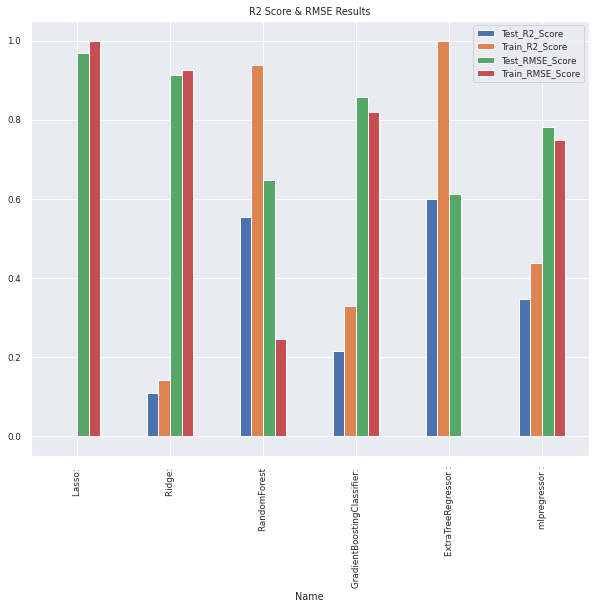

In [ ]:
result_df = pd.DataFrame(model_data)
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score','Train_RMSE_Score'], kind="bar" , title = 'R2 Score & RMSE Results' , figsize= (10,8)) ;
plt.show()

<b>

1)	It is clearly seen that best results for test set is being given by Extra Tree Regressor with R2 score of 0.599255

2)	Least RMSE score is also by Extra Tree Regressor 0.612780

3)	Lasso regression model over Linear regression was not giving good result and hence proven to be the worst model.


In [ ]:
import pickle
clf1 = ExtraTreesRegressor()
et=clf1.fit(X_train_ss,y_train_ss)

# Saving model to disk
pickle.dump(et, open('model.pkl','wb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


<b>7) hyperparameter tuning using grid search

Extra Trees Regressor performed the best with default parameters. I used grid search cross validation using the GridSearchCV function of the sklearn.model_selection library. The parameters which were tuned :

1. n_estimators: The number of trees to be used

2. max_features: The number of features tob e considered at each split

3. max_depth : The maximum depth of the tree , If no param is provided then splitting will continue till all leaves are pure or contain less the min_samples_split specified

In [ ]:
param_grid = [{
              'max_depth': [100, 150, 200,260],
              'n_estimators' : [100,150,200,260],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)

grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train_ss, y_train_ss)

# Tuned para
print(grid_search.best_params_)








Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 260}


<b>Best estimator

In [ ]:
print(grid_search.best_estimator_)

ExtraTreesRegressor(max_depth=100, max_features='sqrt', n_estimators=260,
                    random_state=40)


<b>R2 score for training

In [ ]:
print(grid_search.best_estimator_.score(X_train_ss,y_train_ss))

1.0


<b>R2 score for testing

In [ ]:
print(grid_search.best_estimator_.score(X_test_ss,y_test_ss))

0.6094925812402627


<b>RMSE score on test set

In [ ]:
print(np.sqrt(mean_squared_error(y_test_ss, grid_search.best_estimator_.predict(X_test_ss))))

0.6049017241138741


Depending on parameter tunning we can conclude that

•	Best possible parameter combination are - 'max_depth' is  100, max_features is 'sqrt', 'n_estimators' is 260 and random state is 40

•	Training set R2 score of 1.0 shows the overfitting on training set

•	Using hyperparameter tuning the R2 score can be improved from 0.59 to 0.60 of the Test set

•	Test set RMSE score is 0.60 which is get improved from 0.61 achieved using hyperparameter tuning.


<b>Conclusions

According to above used models 
The top 3 important features are humidity attributes, which causes the conclusion that humidity affects power consumption more than temperature. Windspeed is least effective as the speed of wind doesn’t affect power consumption inside the house. So controlling humidity inside the house may inccurs to energy savings.
